In [ ]:
import seaborn as sns
df_tt=sns.load_dataset('titanic')

In [ ]:
df_ttsp= df_tt[['survived','fare','pclass']]

### 과적합을 확인하기 위한 시각화 함수

In [ ]:
#classifier 의 Boundary 시각화 함수

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()

    # train data scatter plot으로 나타내기
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()

    # 호출 파라미터로 들어온 train data model 학습 .
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # contourf() 를 이용하여 class boundary 를 visualization 수행.
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

## 튜닝하지 않고 전체 다 학습

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=111)

X_train, X_test, y_train, y_test = train_test_split(df_ttsp[['pclass','fare']], df_ttsp['survived'], test_size=0.3, random_state=111)
#학습
dt_clf = dt_clf.fit(X_train, y_train)

/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/var/folders/sz/167qwb595mqgwry5mm8685n00000gn/T/ipykernel_18556/1819494650.py:23: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


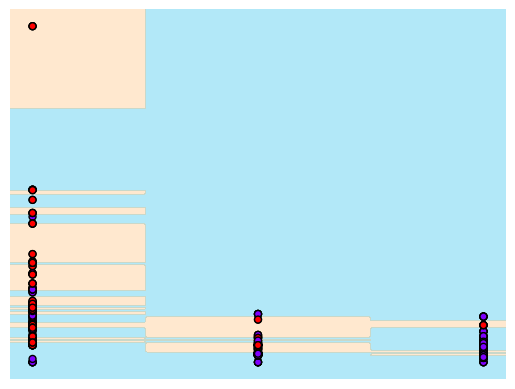

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
visualize_boundary(dt_clf, df_ttsp[['pclass','fare']], df_ttsp['survived'])

## 과적합을 막기 위해 하이퍼파라미터를 튜닝

In [ ]:
dt_clf_2 = DecisionTreeClassifier(max_depth = 6 , min_samples_split = 5, random_state=111)


X_train, X_test, y_train, y_test = train_test_split(df_ttsp[['pclass','fare']], df_ttsp['survived'], test_size=0.3, random_state=111)


#학습
dt_clf_2 = dt_clf_2.fit(X_train, y_train)

/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/var/folders/sz/167qwb595mqgwry5mm8685n00000gn/T/ipykernel_18556/1819494650.py:23: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


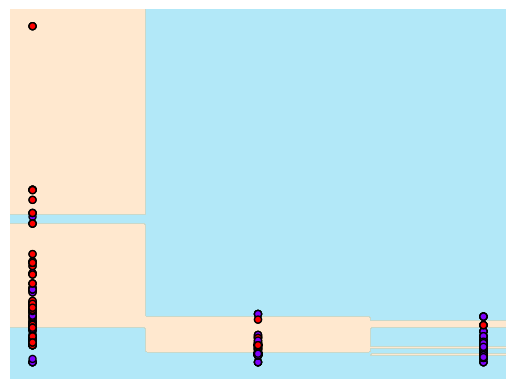

In [ ]:
visualize_boundary(dt_clf_2, df_ttsp[['pclass','fare']], df_ttsp['survived'])

In [ ]:
#정확도 측정
from sklearn.metrics import accuracy_score


In [ ]:
pred_train = dt_clf.predict(X_train)
ac_train = accuracy_score(y_train, pred_train)
pred_test = dt_clf.predict(X_test)
ac_test = accuracy_score(y_test, pred_test)


print('전체 학습한 트레인 정확도', ac_train)
print('전체 학습한 테스트 정확도', ac_test)

print(dt_clf.get_params())

전체 학습한 트레인 정확도 0.8073836276083467
전체 학습한 테스트 정확도 0.8097014925373134
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 111, 'splitter': 'best'}


### 튜닝을 한 경우

In [ ]:
pred_train = dt_clf_2.predict(X_train)
ac_train = accuracy_score(y_train, pred_train)
pred_test = dt_clf_2.predict(X_test)
ac_test = accuracy_score(y_test, pred_test)


print('전체 학습한 트레인 정확도', ac_train)
print('전체 학습한 테스트 정확도', ac_test)

print(dt_clf_2.get_params())

전체 학습한 트레인 정확도 0.7512038523274478
전체 학습한 테스트 정확도 0.7649253731343284
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 6, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'random_state': 111, 'splitter': 'best'}


### 교차검증 등 전체적인 내용 추가 정리

              precision    recall  f1-score   support

           0       0.72      0.77      0.75       122
           1       0.67      0.61      0.64        92

    accuracy                           0.70       214
   macro avg       0.69      0.69      0.69       214
weighted avg       0.70      0.70      0.70       214

Accuracy: 0.7009345794392523


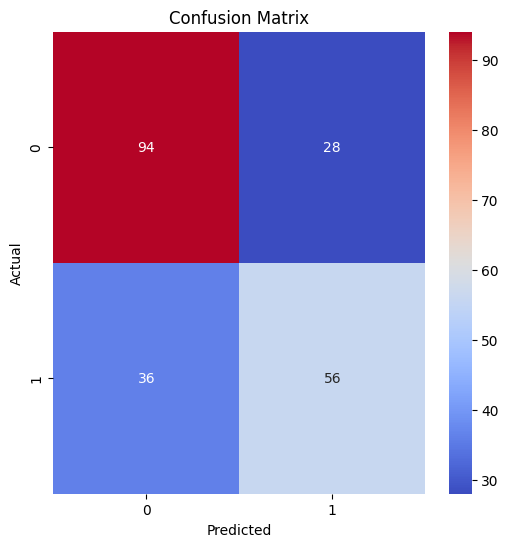

Cross-validation scores: [0.73426573 0.81118881 0.77464789 0.74647887 0.78169014]
Mean cross-validation score: 0.7696542893725992
Best parameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 2, 'splitter': 'best'}
Best cross-validation score: 0.8172121212121212
              precision    recall  f1-score   support

           0       0.76      0.83      0.79       122
           1       0.74      0.65      0.69        92

    accuracy                           0.75       214
   macro avg       0.75      0.74      0.74       214
weighted avg       0.75      0.75      0.75       214

Accuracy: 0.7523364485981309


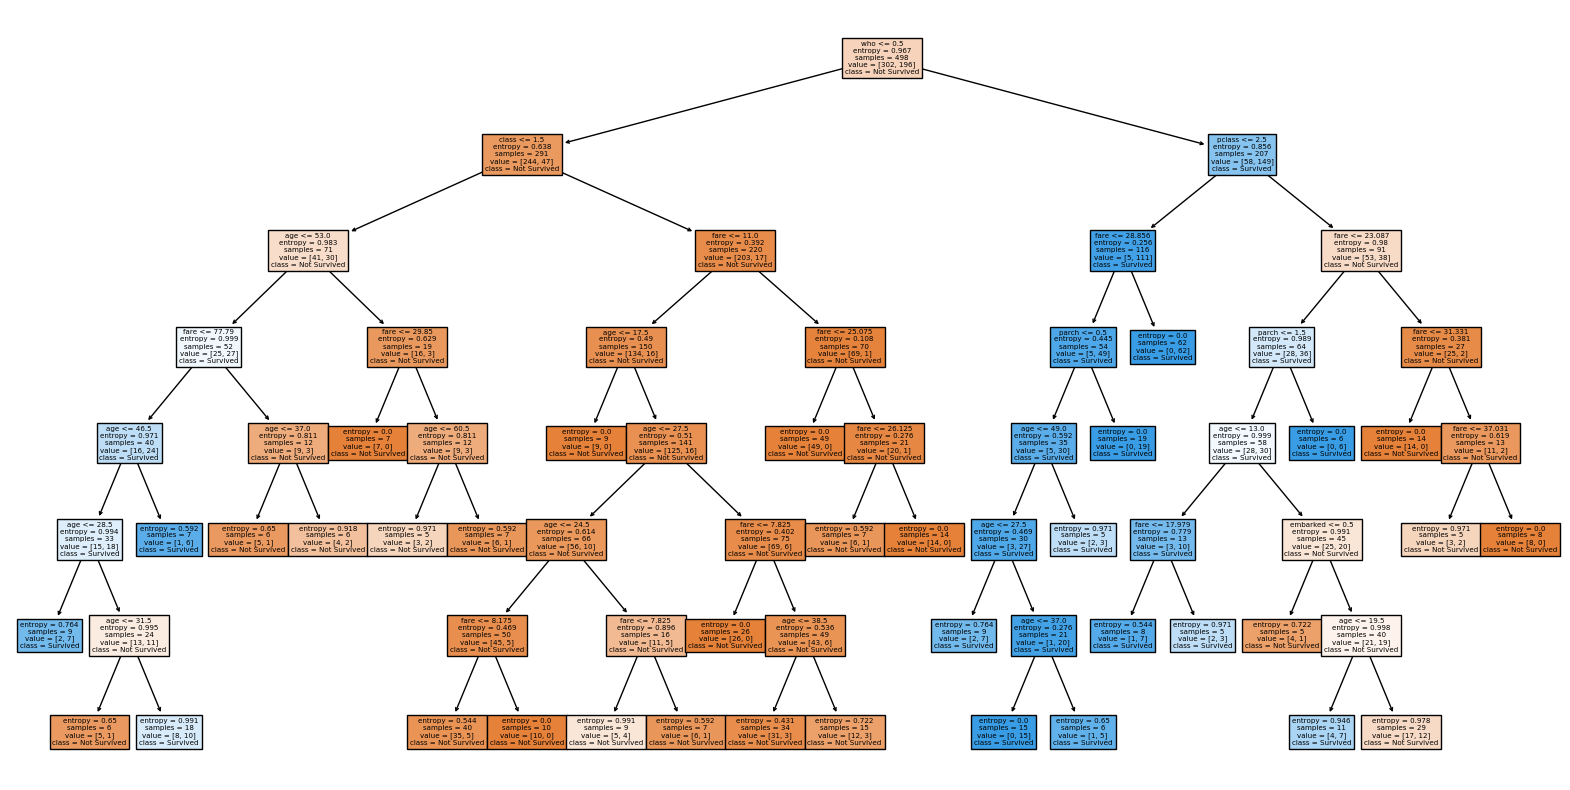

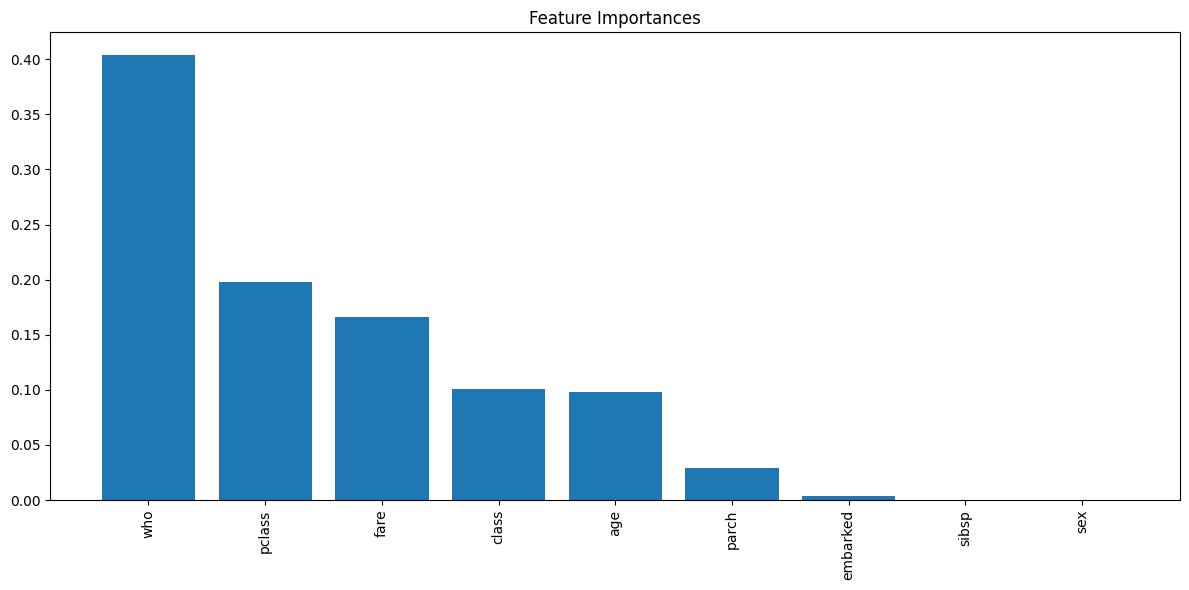

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 타이타닉 데이터셋 로드
# 데이터셋이 인터넷에서 로드되지 않으므로 로컬에 저장된 CSV 파일을 사용합니다.
titanic = sns.load_dataset('titanic')

# 데이터 전처리
titanic = titanic.dropna(subset=['age', 'embarked', 'fare', 'sex', 'class', 'who'])
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})
titanic['class'] = titanic['class'].map({'First': 1, 'Second': 2, 'Third': 3})
titanic['who'] = titanic['who'].map({'man': 0, 'woman': 1, 'child': 2})

# 특성과 타겟 변수 설정
X = titanic[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who']]
y = titanic['survived']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 모델 학습
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# 예측 및 평가
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

# 혼동 행렬 시각화
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 교차 검증
cv_scores = cross_val_score(dt, X, y, cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean()}')

# 하이퍼파라미터 튜닝
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}
grid_search = GridSearchCV(dt, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation score: {grid_search.best_score_}')

# 최적 모델로 예측 및 평가
best_dt = grid_search.best_estimator_
y_pred_best = best_dt.predict(X_test)
print(classification_report(y_test, y_pred_best))
print(f'Accuracy: {accuracy_score(y_test, y_pred_best)}')

# 트리 구조 시각화
plt.figure(figsize=(20,10))
plot_tree(best_dt, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'])
plt.show()

# 피처 중요도
importances = best_dt.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()


### RandomForest 코드

In [ ]:
## Decision Tree- 패키지를 사용하고 RandomForest가 무엇이 다른지 확인

from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
import numpy as np

In [ ]:
## 부트스트랩
## 다수결 보팅

class simpleRandomForest:
    def __init__(self, n_estimators= 10, max_depth=None, max_features = 'sqrt'):
        self.n_estimators= n_estimators #사용할 트리의 개수
        self.max_depth = max_depth #트리 최대 깊이
        self.max_features = max_features # 각 노드에서 사용할 최대 특성 개수
        self.trees = [] #학습에 필요한 트리 저장하는 리스트

    def fit(self,X,y):
        n_samples, n_features =X.shape

        #max_features 'sqrt'
        if self.max_features =='sqrt':
            self.max_features = int(np.sqrt(n_features))

        ##부트스트랩으로 샘플링
        for _ in range(self.n_estimators):
            # 부트스트랩 샘플링
            X_sample, y_sample=resample(X,y)

            #결정트리로 학습
            tree =DecisionTreeClassifier(max_depth =self.max_depth, max_features = self.max_features)
            tree.fit(X_sample, y_sample)

            #학습된 트리 저장
            self.trees.append(tree)

    def predict(self,X):
        #다수결 투표가 중요! voting
        tree_preds = np.array([tree.predict(X) for tree in self.trees])

        #다수결 투표
        return np.array([np.bincount(tree_preds[:, i]).argmax() for i in range(X.shape[0])])



In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

# 트레인,테스트 나누기

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=111)

In [ ]:
## srf

rf =simpleRandomForest(n_estimators = 10, max_depth= 5, max_features = 'sqrt')

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
predictions = rf.predict(X_test)

In [ ]:
predictions

array([0, 0, 2, 2, 2, 0, 0, 2, 2, 1, 2, 0, 1, 2, 2, 0, 2, 1, 0, 2, 1, 2,
       1, 1, 2, 0, 0, 2, 0, 2])